In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [58]:
df = pd.read_csv("data.csv")

In [59]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [60]:
df.drop(["id", "Unnamed: 32"], axis= 1, inplace= True)
df.sample(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
402,B,12.960,18.29,84.18,525.2,0.07351,0.07899,0.04057,0.01883,0.1874,...,14.13,24.61,96.31,621.9,0.09329,0.23180,0.16040,0.06608,0.3207,0.07247
50,B,11.760,21.60,74.72,427.9,0.08637,0.04966,0.01657,0.01115,0.1495,...,12.98,25.72,82.98,516.5,0.10850,0.08615,0.05523,0.03715,0.2433,0.06563
459,B,9.755,28.20,61.68,290.9,0.07984,0.04626,0.01541,0.01043,0.1621,...,10.67,36.92,68.03,349.9,0.11100,0.11090,0.07190,0.04866,0.2321,0.07211
437,B,14.040,15.98,89.78,611.2,0.08458,0.05895,0.03534,0.02944,0.1714,...,15.66,21.58,101.20,750.0,0.11950,0.12520,0.11170,0.07453,0.2725,0.07234
6,M,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,22.88,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368


In [61]:
M = df[df.diagnosis == "M"]
B = df[df.diagnosis == "B"]

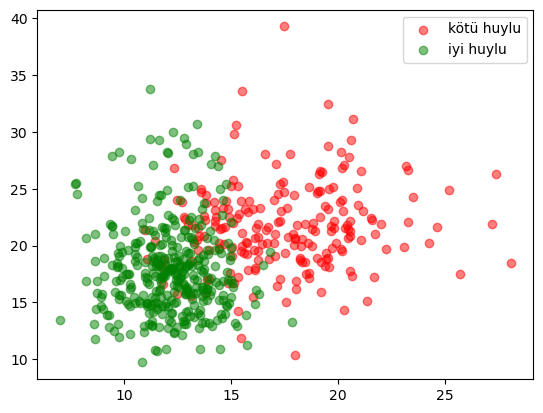

In [71]:
plt.scatter(M.radius_mean, M.texture_mean, color= "red", label= "kötü huylu", alpha= 0.5)
plt.scatter(B.radius_mean, B.texture_mean , color= "green", label= "iyi huylu",alpha= 0.5)
plt.legend()
plt.show()

In [63]:
# labelleri M ve B'den 1 ve 0'a çevir.

df.diagnosis = [1 if i == "M" else 0 for i in df.diagnosis]

In [64]:
X = df.drop("diagnosis", axis= 1)
y = df.diagnosis.values

In [65]:
#normalization
X = (X - np.min(X)) / (np.max(X) - np.min(X))

/Users/alicankizal/miniconda3/envs/sklearn-env/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/Users/alicankizal/miniconda3/envs/sklearn-env/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
/Users/alicankizal/miniconda3/envs/sklearn-env/lib/python3.11/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduct

In [66]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 1)

In [94]:
#knn model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors= 6)
knn.fit(X_train, y_train)
knn.predict(X_test)

array([0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0])

In [95]:
print(f"{6} nn score : {knn.score(X_test, y_test)}")

6 nn score : 0.9649122807017544


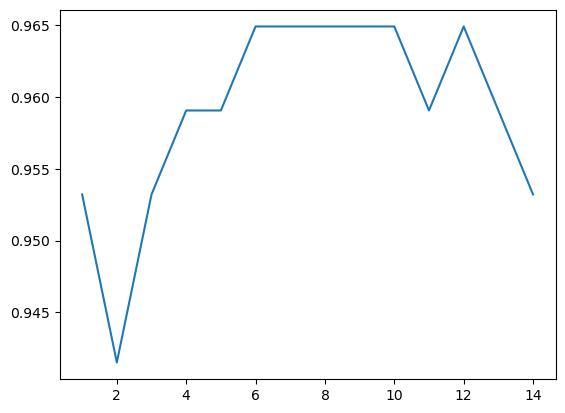

In [96]:
#finding k value
value_list = []
for each in range(1,15):

    knn2 = KNeighborsClassifier(n_neighbors= each)
    knn2.fit(X_train, y_train) 
    value_list.append(knn2.score(X_test, y_test))
plt.plot(range(1,15), value_list)
plt.show()